[(241, 455, 562, 134)]
parametry częsci twarzy
left eye [(66, 72), (80, 63), (98, 64), (115, 78), (96, 81), (78, 80)]
right eye [(197, 81), (213, 68), (233, 69), (251, 79), (234, 86), (214, 85)]
nose tip [(124, 162), (134, 167), (145, 171), (158, 169), (172, 167)]
nose bridge [(152, 70), (149, 95), (146, 120), (142, 145)]
top lip [(99, 212), (116, 203), (132, 197), (146, 202), (160, 199), (182, 207), (208, 216), (198, 217), (160, 216), (145, 216), (132, 214), (107, 214)]
bottom lip [(208, 216), (182, 234), (160, 239), (144, 240), (130, 237), (114, 229), (99, 212), (107, 214), (132, 215), (145, 217), (160, 216), (198, 217)]
lewe oko zdj


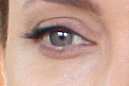

prawe oko zdj


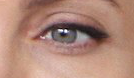

nos zdj


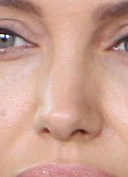

usta


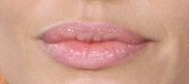

In [53]:
import dlib
import face_recognition
import numpy as np
from PIL import Image, ImageDraw
import os

cwd = os.getcwd()
inputDir = cwd + "/input"

image = face_recognition.load_image_file(inputDir + "/angelina_jolie/angela.jpg")
face_locations = face_recognition.face_locations(image)
print(face_locations)
for face_location in face_locations:
    top, right, bottom, left = face_location
    face_image = image[top:bottom, left:right]
    pil_face_image = Image.fromarray(face_image)
    
# display(pil_face_image)
# print(face_locations)
face_landmarks_list = face_recognition.face_landmarks(face_image, model='large')

for face_landmarks in face_landmarks_list:
    print("parametry częsci twarzy")
    print('left eye', face_landmarks['left_eye']) #6
    print('right eye', face_landmarks['right_eye']) #6
    print('nose tip', face_landmarks['nose_tip']) #5
    print('nose bridge', face_landmarks['nose_bridge']) #4
    print('top lip', face_landmarks['top_lip']) #12
    print('bottom lip', face_landmarks['bottom_lip']) #12
    
# encoding -> czy jestesmy w stanie porownac oko z okiem i sensownie to pokazać  

padding = 40
# lewe oko
print("lewe oko zdj")
# area = (43, 63, 113, 114) # 1: 58, 93 | 4: 103, 94 => 1: -15, -30 | 4: +10, +20
area = (face_landmarks['left_eye'][0][0]-padding, face_landmarks['left_eye'][0][1]-padding, face_landmarks['left_eye'][3][0]+padding,face_landmarks['left_eye'][3][1]+padding)
crop_img = pil_face_image.crop(area)
display(crop_img)

# prawe oko
print("prawe oko zdj")
# area = (153, 60, 223, 105) # 1: 168, 90 | 4: 213, 85
area = (face_landmarks['right_eye'][0][0]-padding, face_landmarks['right_eye'][0][1]-padding, face_landmarks['right_eye'][3][0]+padding,face_landmarks['right_eye'][3][1]+padding)
crop_img = pil_face_image.crop(area)
display(crop_img)

# nos
print("nos zdj")
# area = (153, 60, 223, 105) # 1: 168, 90 | 4: 213, 85
area = (face_landmarks['nose_tip'][0][0]-padding, face_landmarks['nose_bridge'][0][1]-padding, face_landmarks['nose_tip'][-1][0]+padding,face_landmarks['nose_tip'][-1][1]+padding)
crop_img = pil_face_image.crop(area)
display(crop_img)

# usta
print("usta")
# area = (153, 60, 223, 105) # 1: 168, 90 | 4: 213, 85
area = (face_landmarks['top_lip'][0][0]-padding, face_landmarks['top_lip'][0][1]-padding, face_landmarks['top_lip'][6][0]+padding,face_landmarks['top_lip'][6][1]+padding)
crop_img = pil_face_image.crop(area)
display(crop_img)

I found 1 face(s) in this photograph.
The chin in this face has the following points: [(160, 307), (160, 343), (162, 380), (166, 417), (174, 453), (191, 486), (217, 514), (248, 538), (284, 544), (324, 542), (364, 526), (398, 506), (424, 477), (437, 442), (445, 403), (453, 364), (459, 324)]
The left_eyebrow in this face has the following points: [(179, 276), (197, 264), (219, 262), (241, 269), (261, 280)]
The right_eyebrow in this face has the following points: [(314, 280), (341, 271), (369, 267), (397, 273), (417, 290)]
The nose_bridge in this face has the following points: [(286, 310), (283, 335), (279, 361), (276, 386)]
The nose_tip in this face has the following points: [(258, 404), (269, 409), (279, 413), (292, 411), (304, 408)]
The left_eye in this face has the following points: [(201, 312), (214, 304), (233, 306), (249, 318), (230, 321), (213, 320)]
The right_eye in this face has the following points: [(331, 321), (347, 310), (368, 310), (385, 319), (368, 326), (348, 325)]
The to

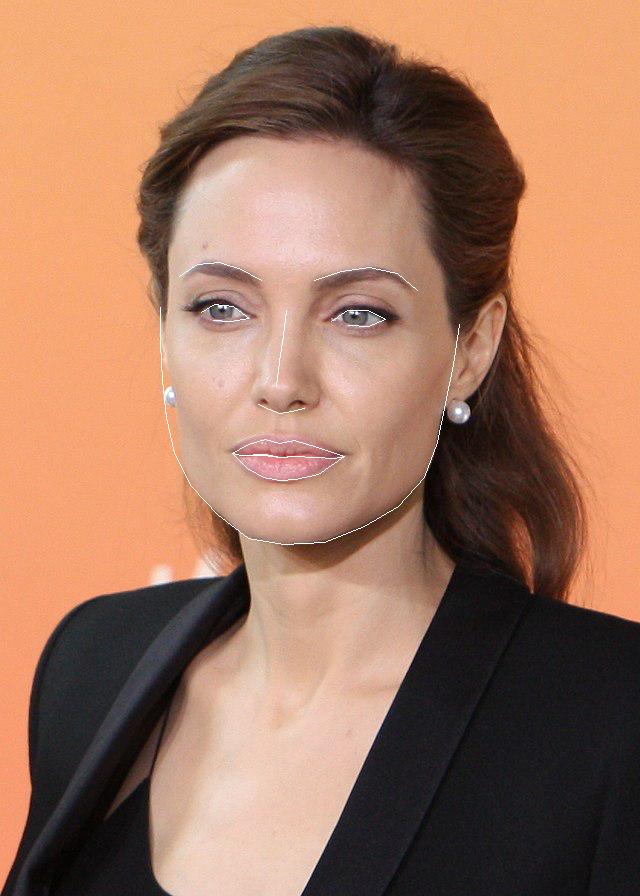

In [39]:
from PIL import Image, ImageDraw
import face_recognition

# Load the jpg file into a numpy array
# image = face_recognition.load_image_file(inputDir + "/john_cenax.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=1)

# Show the picture
display(pil_image)

# for face_landmarks in face_landmarks_list:
#     d = ImageDraw.Draw(pil_image, 'RGBA')

#     # Make the eyebrows into a nightmare
#     d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
#     d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
#     d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
#     d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

#     # Gloss the lips
#     d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
#     d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
#     d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
#     d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

#     # Sparkle the eyes
#     d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
#     d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

#     # Apply some eyeliner
#     d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
#     d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

#     display(pil_image)

# for face_location in face_locations:
#     top, right, bottom, left = face_location
    
#     face_image = image[top:bottom, left:right]
#     pil_image = Image.fromarray(face_image)
#     display(pil_image) 
#